In [1]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the predictions

In [3]:
df = pd.read_csv(r"C:\Users\neupa\Downloads\Final_test_Predictions.csv")

In [4]:
df

,title,text,label,title_tokens,text_tokens,text_summary,input,predicted_labels,predicted_probability_0,predicted_probability_1
0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,13,387,NaN,House Intelligence Committee Chairman Devin Nu...,1,0.000203,0.999797
1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,13,477,NaN,Pope Francis used his annual Christmas Day mes...,1,0.000234,0.999766
2,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,1,18,367,NaN,The number of cases of cops brutalizing and ki...,1,0.000186,0.999814
3,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,1,19,481,NaN,Donald Trump spent a good portion of his day a...,1,0.000186,0.999814
4,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,1,19,454,NaN,In the wake of yet another court decision that...,1,0.000369,0.999631
...,...,...,...,...,...,...,...,...,...,...
44893,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,0,19,889,North Korea and the US clashed at a U.N. forum...,North Korea and the US clashed at a U.N. forum...,0,0.999795,0.000205
44894,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,0,19,889,North Korea and the United States clashed at a...,North Korea and the United States clashed at a...,0,0.999764,0.000236
44895,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,0,20,810,North Korea and the US clashed at the United N...,North Korea and the US clashed at the United N...,0,0.999518,0.000482
44896,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,0,17,554,Two North Korean shipments to a Syrian governm...,Two North Korean shipments to a Syrian governm...,0,0.999425,0.000575


So, we have the actual and predicted values as well as predicted probabilities together. Lets create a confusion matrix first and start looking at some misclassifications.

In [8]:
def perform_deep_test_analysis(y_test, test_preds: np.array) -> None:
    """"
    This function takes in a model object and model name, and performs a deep analysis on the model's performance on the test set.
    It prints classification report, confusion matrix, ROC AUC score and plots the ROC curve.
    """
    cm = confusion_matrix(y_test, test_preds)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("\n")
    print("FOR TESTING SET: ")
    print(classification_report(y_test, test_preds))
    print("\n")
     

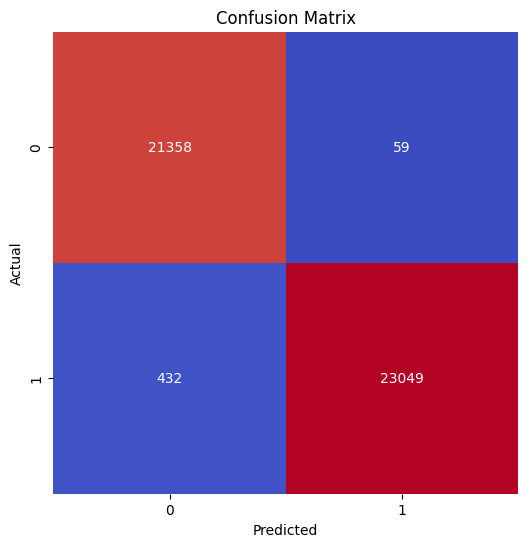



FOR TESTING SET: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     21417
           1       1.00      0.98      0.99     23481

    accuracy                           0.99     44898
   macro avg       0.99      0.99      0.99     44898
weighted avg       0.99      0.99      0.99     44898





In [9]:
perform_deep_test_analysis(df['label'], df['predicted_labels'])

Lets look at the confusion matrix. Only 59 false positives and 432 false negatives. We would want to keep false positives as low as possible as we do not want to predict real news as fake. Lets look at 30 random samples from each case

In [13]:
# False Positives: predicted label is 1, actual label is 0
false_positives = df[(df['label'] == 0) & (df['predicted_labels'] == 1)].sample(n=30, random_state=42).reset_index(drop=True)

# False Negatives: predicted label is 0, actual label is 1
false_negatives = df[(df['label'] == 1) & (df['predicted_labels'] == 0)].sample(n=30, random_state=42).reset_index(drop=True)

In [15]:
false_positives.columns

Index(['title', 'text', 'label', 'title_tokens', 'text_tokens', 'text_summary',
       'input', 'predicted_labels', 'predicted_probability_0',
       'predicted_probability_1'],
      dtype='object')

In [18]:
print("False positives samples: \n")
for i in range(30):
    print(f"Sample {i+1}:\n TITLE: {false_positives['title'][i]}")
    print(f"TEXT: {false_positives['text'][i]}")
    print(f"PREDICTED PROBA 0: {false_positives['predicted_probability_0'][i]}, PREDICTED PROBA 1: {false_positives['predicted_probability_1'][i]}")
    print(f"Actual Label: {false_positives['label'][i]}, Predicted Label: {false_positives['predicted_labels'][i]}")
    print("----------------------------------------------------")

False positives samples: 

Sample 1:
 TITLE: Graphic: Supreme Court roundup
TEXT:  
PREDICTED PROBA 0: 0.03686751, PREDICTED PROBA 1: 0.96313256
Actual Label: 0, Predicted Label: 1
----------------------------------------------------
Sample 2:
 TITLE: Angry and inspired: Democrats train new wave of candidates
TEXT: ROCKVILLE, Md. (Reuters) - The 100 Democratic women who packed into a suburban Maryland conference room recently for a one-day training on how to run for political office were more than activists eager to battle President Donald Trump and his fellow Republicans. The teachers, students and business leaders were also a window into the future for a Democratic Party desperate for new blood, and into the booming effort to turn the left’s grassroots anti-Trump activism into a new wave of Democratic officeholders. As thousands of potential first-time candidates explore  political bids in what Democratic veterans say is an unprecedented surge of activity, a broad but informal networ

In [19]:
print("False negatives samples: \n")
for i in range(30):
    print(f"Sample {i+1}:\n TITLE: {false_negatives['title'][i]}")
    print(f"TEXT: {false_negatives['text'][i]}")
    print(f"PREDICTED PROBA 0: {false_negatives['predicted_probability_0'][i]}, PREDICTED PROBA 1: {false_negatives['predicted_probability_1'][i]}")
    print(f"Actual Label: {false_negatives['label'][i]}, Predicted Label: {false_negatives['predicted_labels'][i]}")
    print("----------------------------------------------------")

False negatives samples: 

Sample 1:
 TITLE: OBAMACARE: Your Dog Might Have Better Healthcare Than You Do
TEXT: Simon Black Sovereign ManBelow is a short email that my friend Sam posted this morning to his Facebook page about his surprisingly positive experience with the US healthcare system.I thought it a fantastic read, and I wanted to pass it along to you:I had to run to the emergency room today for what may be a neurological issue. Dizziness, staggering, loss of balance, that kind of thing.I m in San Diego, one of the most expensive cities in the world, and I have no insurance. I figured I was screwed.But instead, the experience was unreal.I got seen immediately. I didn t even have time to sit down, they just whisked me into an examination room.The doctor and nurse were ON IT, and they took their time with the exam and consultation.The visit ultimately involved staying the whole day for observation, all kinds of tests, sedation and reversal, blood pressure check, a full blood panel

Well, after careful evaluation, we find that there is no randomness here. Model is truly missclassifying as some news articles are indistinguishable. The summary could be the bottleneck here as it is impossible to verify each of the summaries one by one before training the models. 

In [23]:
def evaluate_with_threshold(threshold=0.5):
    """
    Evaluates classification performance at a given threshold.
    Adds a new column 'threshold_predictions' to df.
    Prints confusion matrix and classification report.
    """
    # Create new predictions based on threshold
    df['threshold_predictions'] = (df['predicted_probability_1'] >= threshold).astype(int)
    
    # Confusion matrix and classification report
    cm = confusion_matrix(df['label'], df['threshold_predictions'])
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("\nClassification Report:\n", classification_report(df['label'], df['threshold_predictions']))

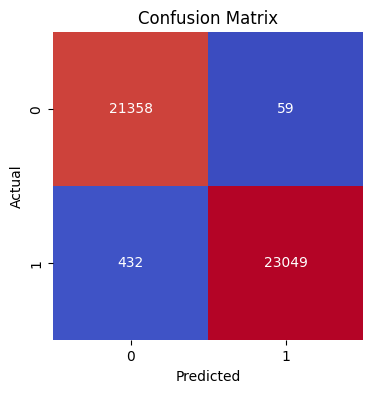


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21417
           1       1.00      0.98      0.99     23481

    accuracy                           0.99     44898
   macro avg       0.99      0.99      0.99     44898
weighted avg       0.99      0.99      0.99     44898



In [24]:
evaluate_with_threshold(0.5)

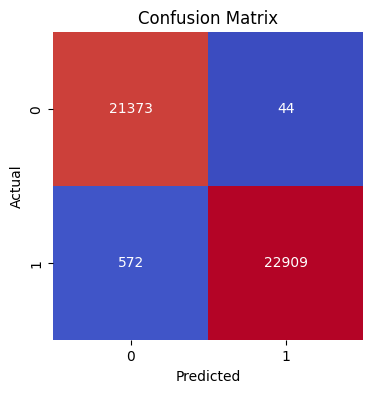


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     21417
           1       1.00      0.98      0.99     23481

    accuracy                           0.99     44898
   macro avg       0.99      0.99      0.99     44898
weighted avg       0.99      0.99      0.99     44898



In [25]:
evaluate_with_threshold(0.6)

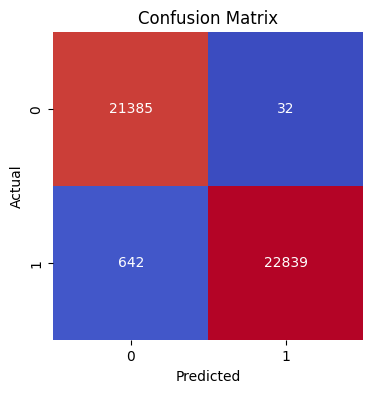


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     21417
           1       1.00      0.97      0.99     23481

    accuracy                           0.98     44898
   macro avg       0.98      0.99      0.98     44898
weighted avg       0.99      0.98      0.98     44898



In [26]:
evaluate_with_threshold(0.65)

As expected, when you increase classification threshold, precision goes up as less false positives but more false negatives and recall goes down. This is the tradeoff between precision and recall. Given that our priority is FPs here and our default classificaiton threshold of 0.5 only yields 59 FPs, it meets our criteria. So, we will leave it as is.